In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drugs = pd.read_csv("drug200.csv")
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Gender

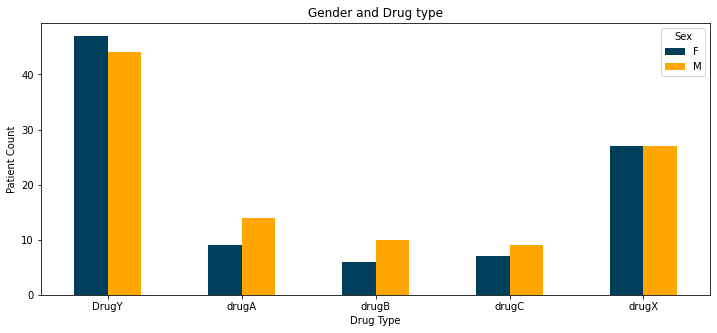

In [26]:
pd.crosstab(drugs.Drug,drugs.Sex).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender and Drug type')
plt.xlabel('Drug Type')
plt.xticks(rotation=0)
plt.ylabel('Patient Count')
plt.show()

### BP

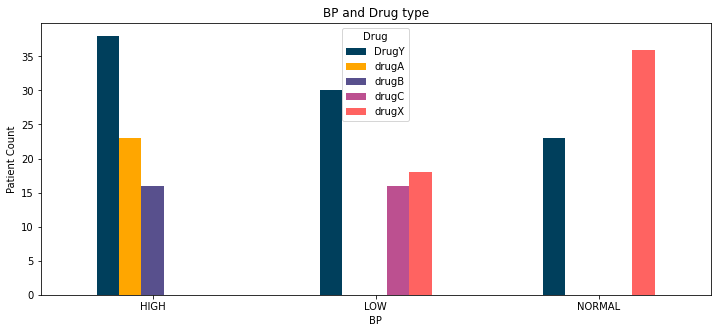

In [27]:
pd.crosstab(drugs.BP,drugs.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('BP and Drug type')
plt.xlabel('BP')
plt.xticks(rotation=0)
plt.ylabel('Patient Count')
plt.show()

### CHOLOSTEROL

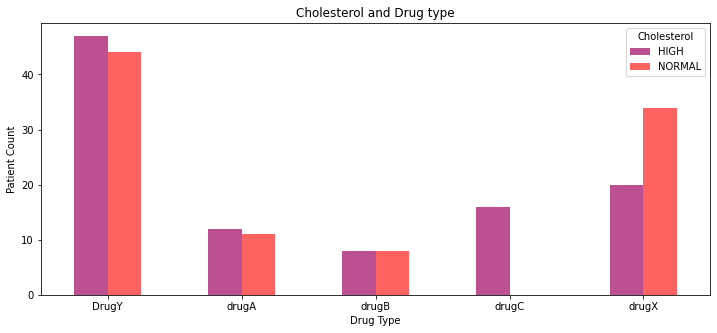

In [32]:
pd.crosstab(drugs.Drug,drugs.Cholesterol).plot(kind="bar",figsize=(12,5),color=['#bc5090','#ff6361'])
plt.title('Cholesterol and Drug type')
plt.xlabel('Drug Type')
plt.xticks(rotation=0)
plt.ylabel('Patient Count')
plt.show()

### Age

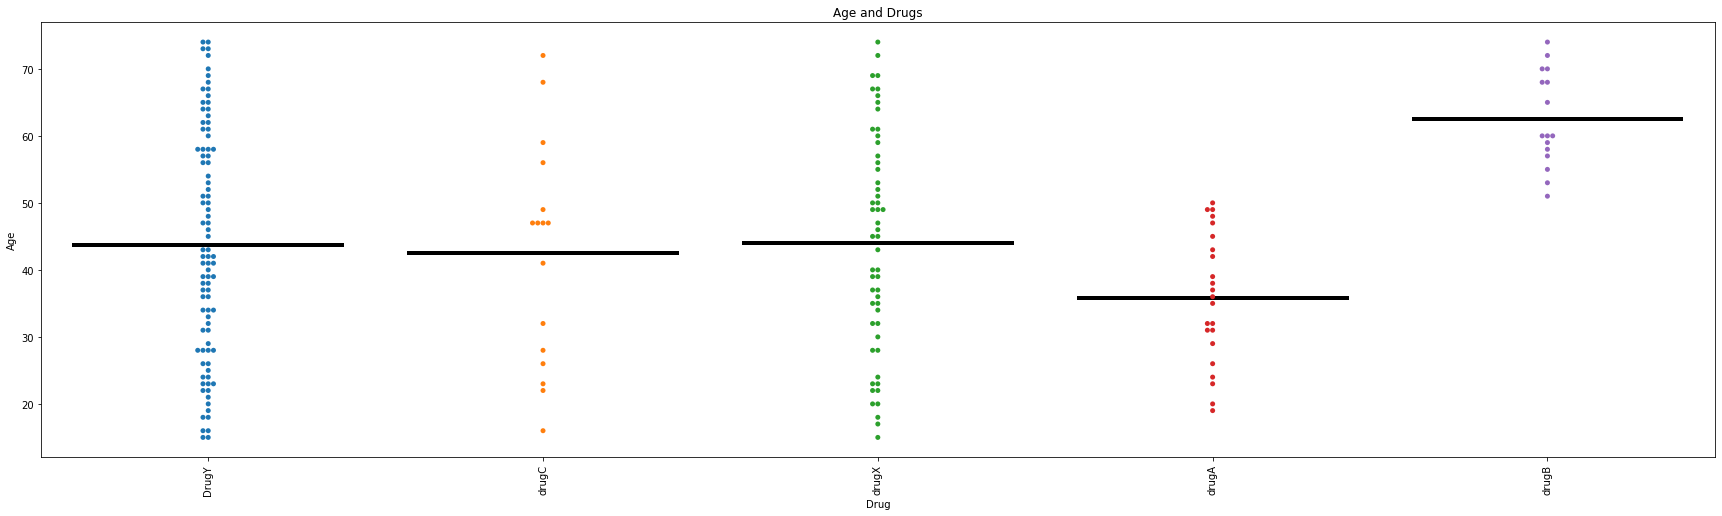

In [6]:
plt.figure(figsize=(30,8))
sns.swarmplot(x="Drug", y="Age", data=drugs).set_title("Age and Drugs")
sns.boxplot(x="Drug", y ="Age", data =drugs, showfliers=False, showbox=False, showcaps=False,
    showmeans=True, meanline=True, meanprops={'color': 'k', 'ls': '-', 'lw': 4}, 
    medianprops={'visible': False}, whiskerprops={'visible': False});
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=90)
plt.show()

### NA_to_K

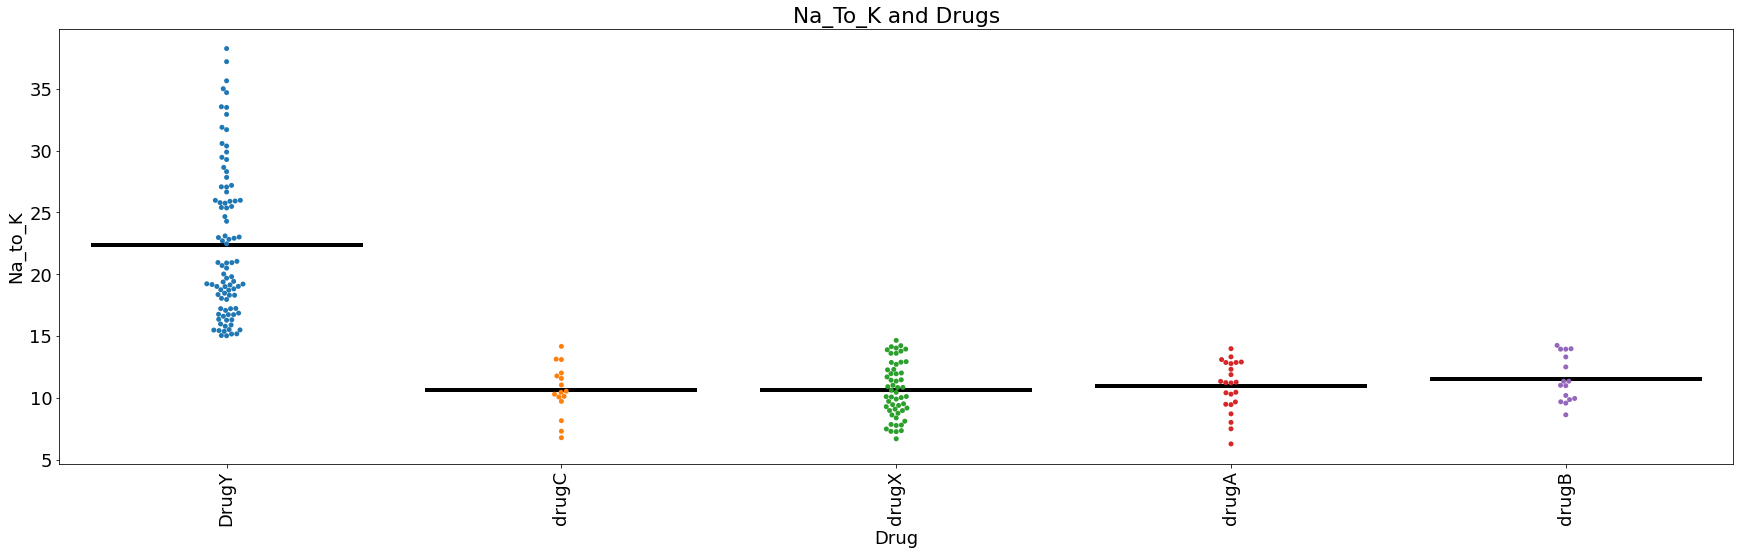

In [7]:
plt.figure(figsize=(30,8))
sns.swarmplot(x="Drug", y="Na_to_K", data=drugs).set_title("Na_To_K and Drugs")
sns.boxplot(x="Drug", y ="Na_to_K", data =drugs, showfliers=False, showbox=False, showcaps=False,
    showmeans=True, meanline=True, meanprops={'color': 'k', 'ls': '-', 'lw': 4}, 
    medianprops={'visible': False}, whiskerprops={'visible': False});
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=90)
plt.show()

### Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [9]:
X = drugs[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = drugs[['Drug']].values
X = pd.DataFrame(X)
X = pd.get_dummies(X)

C:\Program Files\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


### Logistic Regression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LR = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR*100))

              precision    recall  f1-score   support

       DrugY       0.38      0.48      0.43        27
       drugA       0.25      0.25      0.25         4
       drugB       0.00      0.00      0.00         6
       drugC       0.00      0.00      0.00         4
       drugX       0.55      0.58      0.56        19

    accuracy                           0.42        60
   macro avg       0.24      0.26      0.25        60
weighted avg       0.36      0.42      0.39        60

[[13  3  0  2  9]
 [ 3  1  0  0  0]
 [ 6  0  0  0  0]
 [ 4  0  0  0  0]
 [ 8  0  0  0 11]]
Logistic Regression accuracy is: 41.67%


C:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetr

### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [13]:
X = drugs[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = drugs[['Drug']].values
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(X_train,y_train)
predTree = model.predict(X_test)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
DT = metrics.accuracy_score(y_test, predTree)

Decision Trees's Accuracy:  0.9666666666666667


### KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNN = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNN*100))

              precision    recall  f1-score   support

       DrugY       0.87      1.00      0.93        27
       drugA       0.29      0.50      0.36         4
       drugB       1.00      0.17      0.29         6
       drugC       0.00      0.00      0.00         4
       drugX       0.56      0.53      0.54        19

    accuracy                           0.67        60
   macro avg       0.54      0.44      0.42        60
weighted avg       0.69      0.67      0.64        60

[[27  0  0  0  0]
 [ 0  2  0  0  2]
 [ 1  0  1  1  3]
 [ 1  0  0  0  3]
 [ 2  5  0  2 10]]
K Neighbours accuracy is: 66.67%


C:\Program Files\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\Emir Tonoğlu\AppData\Local\Temp\ipykernel_13516\2867829151.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [18]:
from sklearn import metrics
RF = metrics.accuracy_score(y_test, y_pred)
print('Random Forest accuracy is: {:.2f}%'.format(RF*100))

Random Forest accuracy is: 95.00%


### Compare Models

In [19]:
comp = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'K Neighbors', 'Random Forest'], 
                        'Accuracy': [LR*100, DT*100, KNN*100, RF*100]})
comp = comp.sort_values(by='Accuracy', ascending=False)

In [20]:
comp

,Model,Accuracy
1,Decision Tree,96.666667
3,Random Forest,95.000000
2,K Neighbors,66.666667
0,Logistic Regression,41.666667
